In [1]:
from sklearn.metrics import log_loss
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
import numpy as np

## Dataset Preprocessing, Initialisation and Visualization

In [2]:
train_data = pd.read_csv('dataC/train.csv')
test_data = pd.read_csv('dataC/test.csv')

train_data = train_data[:8000]
test_data = test_data[:2000]

X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

X_train = X_train/255.0
X_test = X_test/255.0

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_images = X_train.reshape(-1, 28, 28, 1)
X_test_images = X_test.reshape(-1, 28, 28, 1)


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

## (1) Visulaization of 10 samples from Dataset

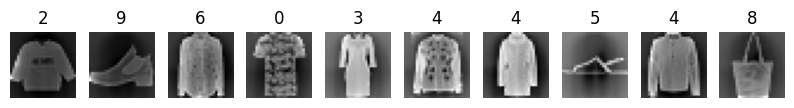

(6400, 784) (1600, 784) (6400,) (1600,)


In [3]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train_images[i].reshape(28, 28), cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

X_train_main, X_val, y_train_main, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train_main.shape, X_val.shape, y_train_main.shape, y_val.shape)

## (2) Training MLP Classifier on 4 different Activation Functions using Adam solver

In [4]:
from sklearn.exceptions import ConvergenceWarning # just to stop printing irrelevant warnings in output
warnings.filterwarnings("ignore", category=ConvergenceWarning)

logistic
Epoch 0: Training Loss: 2.3680, Validation Loss: 2.3661
Epoch 1: Training Loss: 2.3569, Validation Loss: 2.3550
Epoch 2: Training Loss: 2.3463, Validation Loss: 2.3444
Epoch 3: Training Loss: 2.3362, Validation Loss: 2.3344
Epoch 4: Training Loss: 2.3269, Validation Loss: 2.3251
Epoch 5: Training Loss: 2.3181, Validation Loss: 2.3163
Epoch 6: Training Loss: 2.3097, Validation Loss: 2.3080
Epoch 7: Training Loss: 2.3018, Validation Loss: 2.3002
Epoch 8: Training Loss: 2.2942, Validation Loss: 2.2928
Epoch 9: Training Loss: 2.2870, Validation Loss: 2.2857
Epoch 10: Training Loss: 2.2801, Validation Loss: 2.2789
Epoch 11: Training Loss: 2.2733, Validation Loss: 2.2721
Epoch 12: Training Loss: 2.2666, Validation Loss: 2.2657
Epoch 13: Training Loss: 2.2602, Validation Loss: 2.2594
Epoch 14: Training Loss: 2.2538, Validation Loss: 2.2531
Epoch 15: Training Loss: 2.2473, Validation Loss: 2.2468
Epoch 16: Training Loss: 2.2410, Validation Loss: 2.2405
Epoch 17: Training Loss: 2.2347,

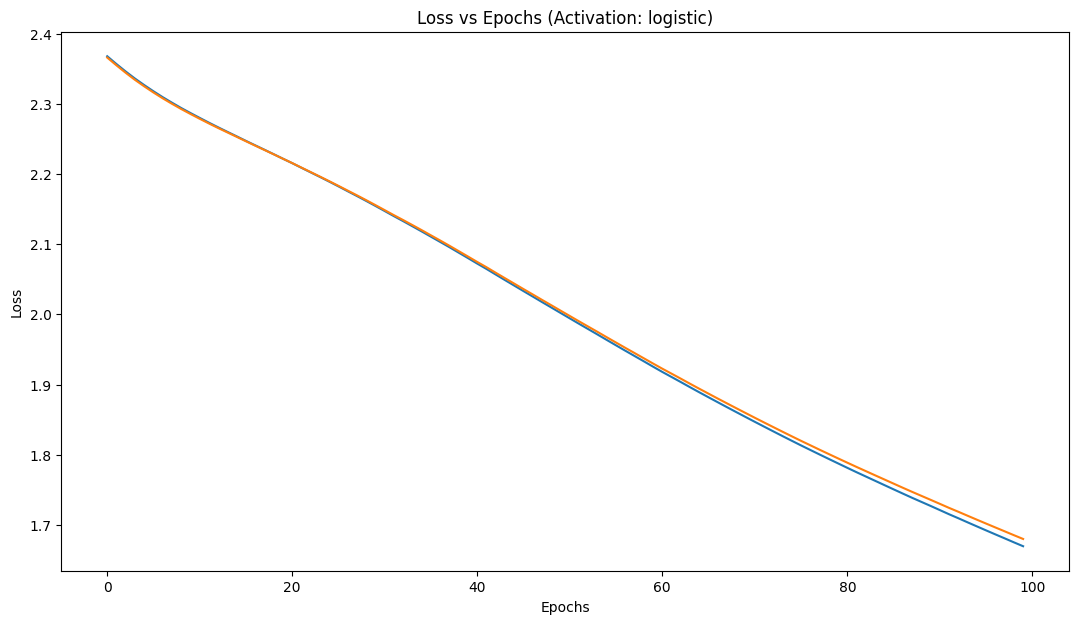

tanh
Epoch 0: Training Loss: 1.9190, Validation Loss: 1.9331
Epoch 1: Training Loss: 1.6425, Validation Loss: 1.6513
Epoch 2: Training Loss: 1.4489, Validation Loss: 1.4566
Epoch 3: Training Loss: 1.3049, Validation Loss: 1.3115
Epoch 4: Training Loss: 1.1982, Validation Loss: 1.2045
Epoch 5: Training Loss: 1.1154, Validation Loss: 1.1215
Epoch 6: Training Loss: 1.0505, Validation Loss: 1.0579
Epoch 7: Training Loss: 0.9972, Validation Loss: 1.0055
Epoch 8: Training Loss: 0.9523, Validation Loss: 0.9619
Epoch 9: Training Loss: 0.9132, Validation Loss: 0.9235
Epoch 10: Training Loss: 0.8794, Validation Loss: 0.8911
Epoch 11: Training Loss: 0.8497, Validation Loss: 0.8631
Epoch 12: Training Loss: 0.8229, Validation Loss: 0.8377
Epoch 13: Training Loss: 0.7988, Validation Loss: 0.8155
Epoch 14: Training Loss: 0.7770, Validation Loss: 0.7943
Epoch 15: Training Loss: 0.7568, Validation Loss: 0.7763
Epoch 16: Training Loss: 0.7381, Validation Loss: 0.7591
Epoch 17: Training Loss: 0.7207, Val

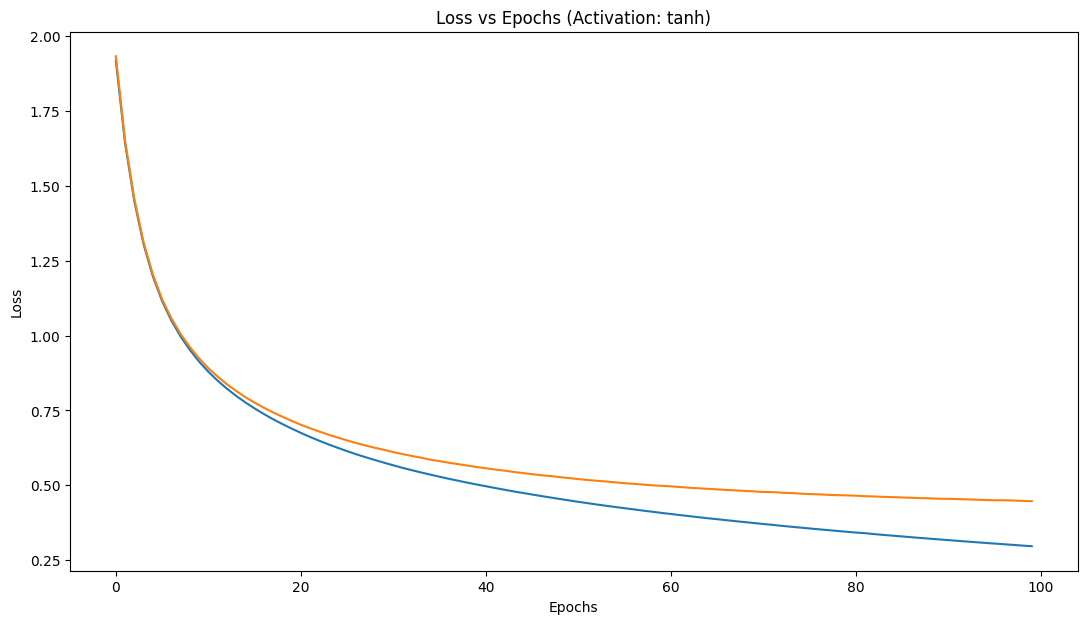

relu
Epoch 0: Training Loss: 2.1930, Validation Loss: 2.1781
Epoch 1: Training Loss: 1.9285, Validation Loss: 1.9217
Epoch 2: Training Loss: 1.7159, Validation Loss: 1.7196
Epoch 3: Training Loss: 1.5401, Validation Loss: 1.5534
Epoch 4: Training Loss: 1.3842, Validation Loss: 1.4040
Epoch 5: Training Loss: 1.2450, Validation Loss: 1.2689
Epoch 6: Training Loss: 1.1316, Validation Loss: 1.1597
Epoch 7: Training Loss: 1.0391, Validation Loss: 1.0710
Epoch 8: Training Loss: 0.9643, Validation Loss: 0.9976
Epoch 9: Training Loss: 0.9018, Validation Loss: 0.9368
Epoch 10: Training Loss: 0.8480, Validation Loss: 0.8845
Epoch 11: Training Loss: 0.8015, Validation Loss: 0.8393
Epoch 12: Training Loss: 0.7611, Validation Loss: 0.8007
Epoch 13: Training Loss: 0.7257, Validation Loss: 0.7665
Epoch 14: Training Loss: 0.6961, Validation Loss: 0.7382
Epoch 15: Training Loss: 0.6699, Validation Loss: 0.7142
Epoch 16: Training Loss: 0.6462, Validation Loss: 0.6911
Epoch 17: Training Loss: 0.6251, Val

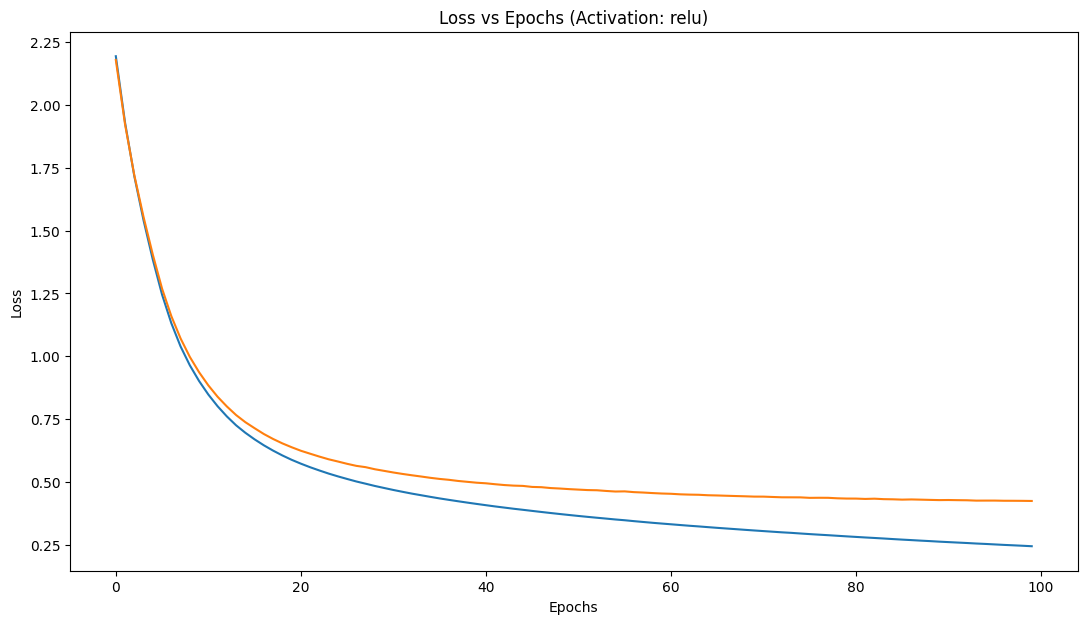

identity
Epoch 0: Training Loss: 2.3895, Validation Loss: 2.3631
Epoch 1: Training Loss: 1.6129, Validation Loss: 1.6021
Epoch 2: Training Loss: 1.2510, Validation Loss: 1.2526
Epoch 3: Training Loss: 1.0521, Validation Loss: 1.0642
Epoch 4: Training Loss: 0.9214, Validation Loss: 0.9424
Epoch 5: Training Loss: 0.8344, Validation Loss: 0.8598
Epoch 6: Training Loss: 0.7692, Validation Loss: 0.8050
Epoch 7: Training Loss: 0.7188, Validation Loss: 0.7605
Epoch 8: Training Loss: 0.6812, Validation Loss: 0.7315
Epoch 9: Training Loss: 0.6499, Validation Loss: 0.7071
Epoch 10: Training Loss: 0.6245, Validation Loss: 0.6833
Epoch 11: Training Loss: 0.6027, Validation Loss: 0.6674
Epoch 12: Training Loss: 0.5845, Validation Loss: 0.6540
Epoch 13: Training Loss: 0.5680, Validation Loss: 0.6394
Epoch 14: Training Loss: 0.5552, Validation Loss: 0.6330
Epoch 15: Training Loss: 0.5422, Validation Loss: 0.6235
Epoch 16: Training Loss: 0.5324, Validation Loss: 0.6160
Epoch 17: Training Loss: 0.5214,

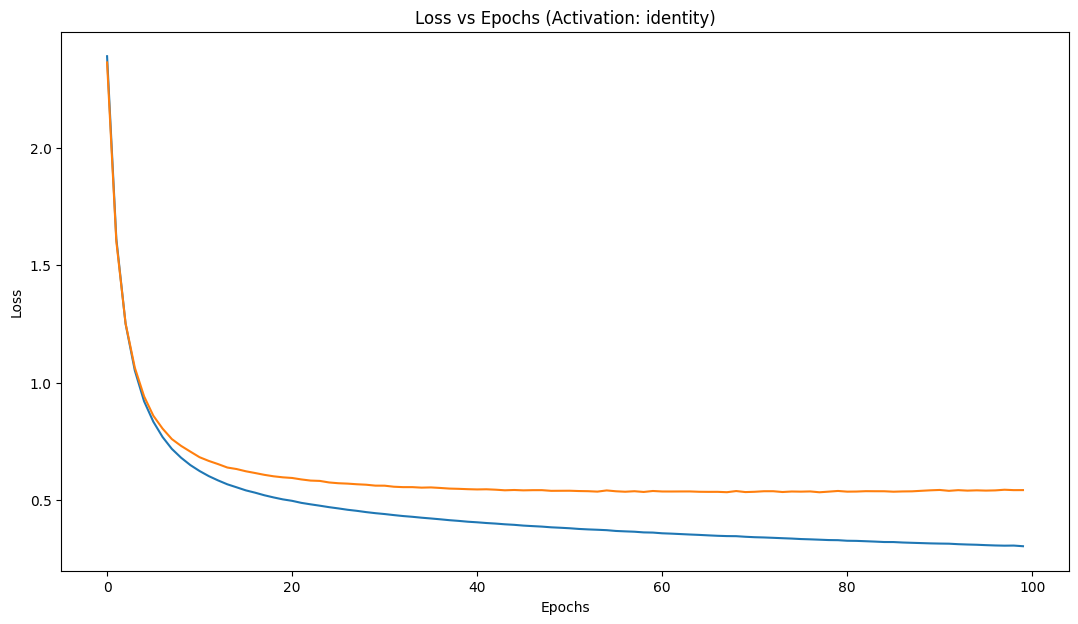

Activation: logistic, Test Accuracy: 45.1000 %
Activation: tanh, Test Accuracy: 84.2500 %
Activation: relu, Test Accuracy: 83.8000 %
Activation: identity, Test Accuracy: 83.0500 %


In [5]:
layer_sizes = [128, 64, 32] 
epochs = 100
lr = 2e-5
batch_size = 128
activations = ['logistic', 'tanh', 'relu', 'identity']

results = {}

for activation in activations:
    print(activation)
    model = MLPClassifier(
        hidden_layer_sizes=layer_sizes,
        activation=activation,
        solver='adam',
        learning_rate_init=lr,
        max_iter=1,  
        batch_size=batch_size,
        warm_start=True
    )
    
    training_losses = []
    validation_losses = []
    
    for epoch in range(epochs):
        model.fit(X_train_main, y_train_main)
        train_loss = log_loss(y_train_main, model.predict_proba(X_train_main)) # determining the log loss for training
        training_losses.append(train_loss)
        val_loss = log_loss(y_val, model.predict_proba(X_val)) # validation loss
        validation_losses.append(val_loss)
        print(f"Epoch {epoch}: Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    results[activation] = {
        'training_losses': training_losses,
        'validation_losses': validation_losses,
        'test_accuracy': model.score(X_test, y_test)
    }

    plt.figure(figsize=(13, 7))
    plt.plot(range(epochs), training_losses, label="Train Loss")
    plt.plot(range(epochs), validation_losses, label="Validation Loss")
    plt.title(f"Loss vs Epochs (Activation: {activation})")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

for activation, metrics in results.items(): # Printing accuracy for each model having different activation functions
    print(f"Activation: {activation}, Test Accuracy: {metrics['test_accuracy']*100:.4f} %")


The best model I chose was one with relu because it showed Good accuracy and also Ended with the lowest validation and training loss among all the models has showed smoother convergence and good gradient descent loss compared to all smoother curve than others even though has less accuracy then tanh but overall had performed better also lowest variance and end among the other models with different activation functions.

### Therefore overall the best activation function model was one with the Relu activation function.


## (3) Performing Grid Search to get best Hyper parameters for model having Relu Activation Function


In [6]:
def grid_search(X, y, activation):
    
    parameters = {
        'solver': ['adam', 'sgd'],
        'learning_rate_init': [1e-4, 1e-3, 5e-3],
        'batch_size': [64, 128, 256]
    }
    
    model = MLPClassifier(
        hidden_layer_sizes=[128, 64, 32],
        activation=activation,
        max_iter=100  
    )

    best_score = -np.inf
    best_parameters = None
    param_grid_list = list(ParameterGrid(parameters))
    
    with tqdm(total=len(param_grid_list)*3, desc="Grid Search Progress") as pbar:
        for params in param_grid_list:
            model.set_params(**params)
            scores = []
            for i in range(3): 
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(10000))
                model.fit(X_train, y_train)
                score = model.score(X_val, y_val)
                scores.append(score)
                pbar.update(1)
 
            avg_score = np.mean(scores) 
            if avg_score > best_score:
                best_score = avg_score
                best_parameters = params
    
    return best_parameters, best_score

In [7]:
activation = 'relu'  
best_params, best_score = grid_search(X_train, y_train, activation)
print("Best Hyperparameters:")
print(best_params)
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

Grid Search Progress: 100%|██████████| 54/54 [24:11<00:00, 26.87s/it]

Best Hyperparameters:
{'batch_size': 64, 'learning_rate_init': 0.001, 'solver': 'adam'}
Best Cross-Validated Accuracy: 0.8729


## (4) MLP regressor for Regeneration Task

In [8]:
c, b, a = 128, 64, 32
layer_sizes = [c, b, a, b, c]

def f(X_train, X_val, X_test, activation, epochs=100, lr=2e-5):

    model = MLPRegressor(
        hidden_layer_sizes=layer_sizes,
        activation=activation,
        solver='adam',
        learning_rate_init=lr,
        max_iter=1,  
        warm_start=True
    )

    training_losses = []
    validation_losses = []
    
    for epoch in range(epochs):
        model.fit(X_train, X_train)

        train_loss = mean_squared_error(X_train, model.predict(X_train))
        val_loss = mean_squared_error(X_val, model.predict(X_val))
        
        training_losses.append(train_loss)
        validation_losses.append(val_loss)
        print(f"Epoch {epoch}: Training Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")

    test_predictions = model.predict(X_test)
    test_r2 = r2_score(X_test, test_predictions)
    print(f"Test R-squared Score: {test_r2:.4f}")
    
    return model, training_losses, validation_losses


Relu got and R2 score of 0.59 and identity got 0.66 that 0.07 increment suggests that the second model has more clearly learned the underlying patterns and performs better therefore the better model on that basis and other metrics is the model with the Identity Activation Function.

In [9]:
X_train_main, X_val = train_test_split(X_train, test_size=0.2, random_state=42)
mlp_relu, relu_train_losses, relu_val_losses = f(X_train_main, X_val, X_test, activation='relu')
mlp_identity, identity_train_losses, identity_val_losses = f(X_train_main, X_val, X_test, activation='identity')

Epoch 0: Training Loss = 1.0120, Validation Loss = 0.9962
Epoch 1: Training Loss = 1.0061, Validation Loss = 0.9902
Epoch 2: Training Loss = 1.0010, Validation Loss = 0.9852
Epoch 3: Training Loss = 0.9947, Validation Loss = 0.9787
Epoch 4: Training Loss = 0.9865, Validation Loss = 0.9704
Epoch 5: Training Loss = 0.9763, Validation Loss = 0.9599
Epoch 6: Training Loss = 0.9643, Validation Loss = 0.9476
Epoch 7: Training Loss = 0.9510, Validation Loss = 0.9339
Epoch 8: Training Loss = 0.9367, Validation Loss = 0.9192
Epoch 9: Training Loss = 0.9213, Validation Loss = 0.9035
Epoch 10: Training Loss = 0.9054, Validation Loss = 0.8872
Epoch 11: Training Loss = 0.8892, Validation Loss = 0.8707
Epoch 12: Training Loss = 0.8725, Validation Loss = 0.8537
Epoch 13: Training Loss = 0.8559, Validation Loss = 0.8368
Epoch 14: Training Loss = 0.8394, Validation Loss = 0.8200
Epoch 15: Training Loss = 0.8233, Validation Loss = 0.8036
Epoch 16: Training Loss = 0.8076, Validation Loss = 0.7878
Epoch 1

### Loss Plots for Relu and Identity mlp Regressor models

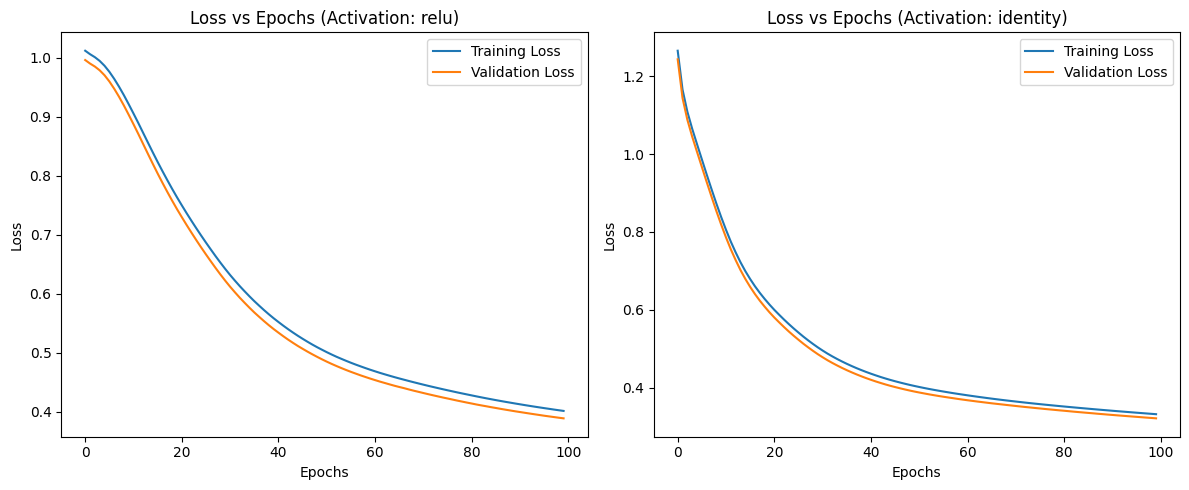

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(relu_train_losses)), relu_train_losses, label="Training Loss")
plt.plot(range(len(relu_val_losses)), relu_val_losses, label="Validation Loss")
plt.title("Loss vs Epochs (Activation: relu)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(identity_train_losses)), identity_train_losses, label="Training Loss")
plt.plot(range(len(identity_val_losses)), identity_val_losses, label="Validation Loss")
plt.title("Loss vs Epochs (Activation: identity)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

def visualize_regenerations(model, X_test, num_samples=10, title="Regenerated Samples"):
    flattened_X_test = X_test[:num_samples].reshape(num_samples, -1)
    regenerated_images = model.predict(flattened_X_test).reshape(-1, 28, 28)
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(regenerated_images[i], cmap='gray')
        plt.axis("off")
    plt.suptitle(title)
    plt.show()


### Regenerated images

Regenerated outputs using 'relu' activation:


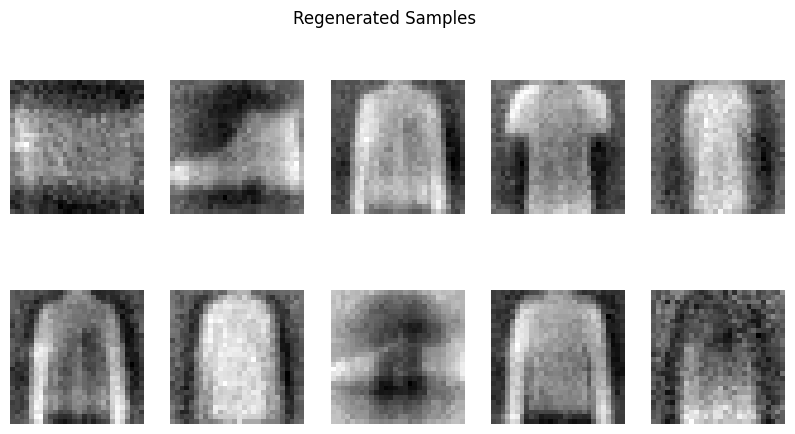

Regenerated outputs using 'identity' activation:


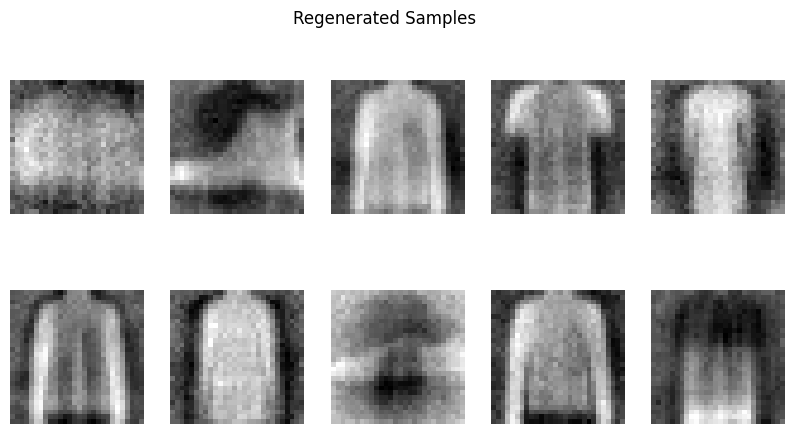

In [11]:
print("Regenerated outputs using 'relu' activation:")
visualize_regenerations(mlp_relu, X_train_images)

print("Regenerated outputs using 'identity' activation:")
visualize_regenerations(mlp_identity, X_train_images)

## (5) Feture Extraction to get less computation but descent accuracy

In [12]:
train_features_relu = mlp_relu.predict(X_train)
test_features_relu = mlp_relu.predict(X_test)
print(train_features_relu.shape)

train_features_identity = mlp_identity.predict(X_train)
print(train_features_identity.shape)
test_features_identity = mlp_identity.predict(X_test)


(8000, 784)
(8000, 784)


In [13]:
new_mlp_relu = MLPClassifier(hidden_layer_sizes=(a, a), max_iter=200, solver='adam', learning_rate_init=2e-5)
new_mlp_identity = MLPClassifier(hidden_layer_sizes=(a, a), max_iter=200, solver='adam', learning_rate_init=2e-5)

new_mlp_relu.fit(train_features_relu, y_train)
new_mlp_identity.fit(train_features_identity, y_train)

y_pred_relu = new_mlp_relu.predict(test_features_relu)
print(y_pred_relu.shape)
y_pred_identity = new_mlp_identity.predict(test_features_identity)
print(y_pred_identity.shape)


(2000,)
(2000,)


In [14]:
accuracy_relu = accuracy_score(y_test, y_pred_relu)
accuracy_identity = accuracy_score(y_test, y_pred_identity)
print("Accuracy of MLP Classifier using ReLU features:", accuracy_relu)
print("Accuracy of MLP Classifier using Identity features:", accuracy_identity)

Accuracy of MLP Classifier using ReLU features: 0.777
Accuracy of MLP Classifier using Identity features: 0.8085


This shows that these two MLP classifiers are still performing well. The reason behind this is that extracting features effectively reduces the dimensionality of the data, which often helps to filter out noise and retain the most critical information. They continue to perform well because they operate on meaningful, structured feature representations derived from my initial network. This balance between efficiency and performance is often desirable when computational resources are limited, or when faster training is needed without significantly sacrificing accuracy.
